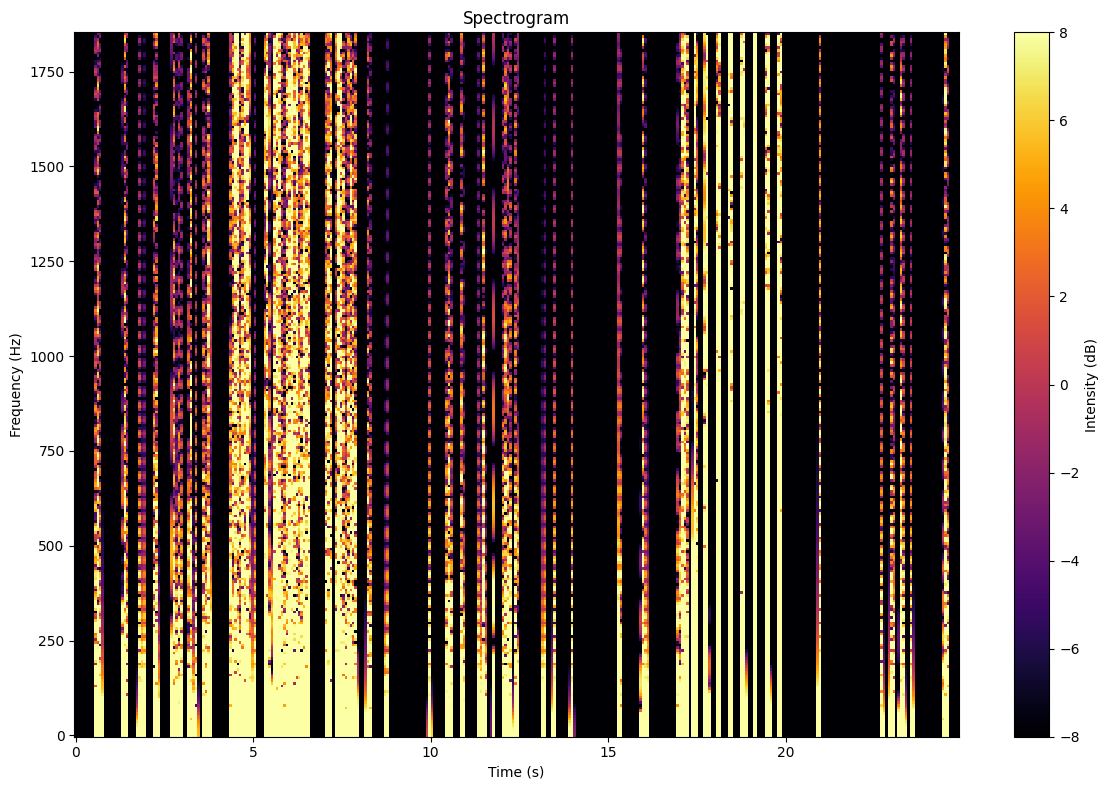

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load the CSV file
df = pd.read_csv('spectrogram_data.csv')

# Extract unique time and frequency values
time_values = df['Time (s)'].unique()
freq_values = df['Frequency (Hz)'].unique()

# Reshape the intensity values back into a 2D array
intensity_matrix = np.zeros((len(time_values), len(freq_values)))
for i, row in df.iterrows():
    time_idx = np.where(time_values == row['Time (s)'])[0][0]
    freq_idx = np.where(freq_values == row['Frequency (Hz)'])[0][0]
    intensity_matrix[time_idx, freq_idx] = row['Intensity (dB)']

# Create the plot with the same visual settings as the original
plt.figure(figsize=(12, 8))
plt.pcolormesh(time_values, freq_values, intensity_matrix.T,
               cmap='inferno',
               norm=Normalize(vmin=-8, vmax=8),
               shading='auto')

# Add a colorbar with the same settings
cbar = plt.colorbar(label='Intensity (dB)')
cbar.set_ticks(np.arange(-8, 9, 2))

# Add labels and title
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()
